# Local Binary Patterns implementation

Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.
- Convert an image to grayscale
- 3 by 3 pixel: For each pixel in the grayscale image, we select a neighborhood of size r, say three, surrounding the center pixel.
- Binary operation: For each pixel's three by three neighboor, compapre the center value and its neighboor values. If the neighboor values are greater than center, record 1 else record 0.
- Decimal: Convert the binary operated values to a decimal value.

## Connecting the drive to get the image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libreries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

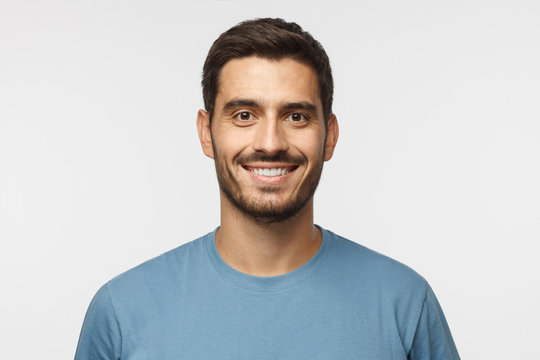

In [ ]:
image_path = '/content/drive/MyDrive/medical_imaging/face_image.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)

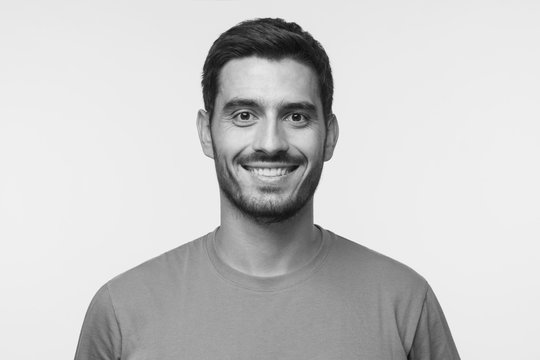

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

## The LBP function

In [36]:
def lbp(image):

  height, width = image.shape
  treated_image = np.zeros((height, width), dtype=np.uint8)
  histogram = np.zeros(256, dtype=np.uint32)

  for i in range(1, height -1):
    for j in range(1,width -1):

      center = image[i,j]
      voisinage = [image[i-1,j-1], image[i-1,j], image[i-1,j+1],
                   image[i,j+1], image[i+1,j+1],
                   image[i+1,j],image[i+1,j-1], image[i,j-1]]


      binary_string = ""
      for ng in voisinage:
        binary_string += "1" if ng >= center else "0"

      lbp_code = int(binary_string, 2)
      treated_image[i, j] = lbp_code
      histogram[lbp_code] += 1

  return treated_image, histogram

## To Get the treated image and the histogram from the lbp function

In [38]:
traited_image, histogram= lbp(gray_image)

In [30]:
def display_image_and_histogram(image, histogram):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Treated Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(256), histogram, color='blue')
    plt.title('Histogram')
    plt.xlabel('LBP Code')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

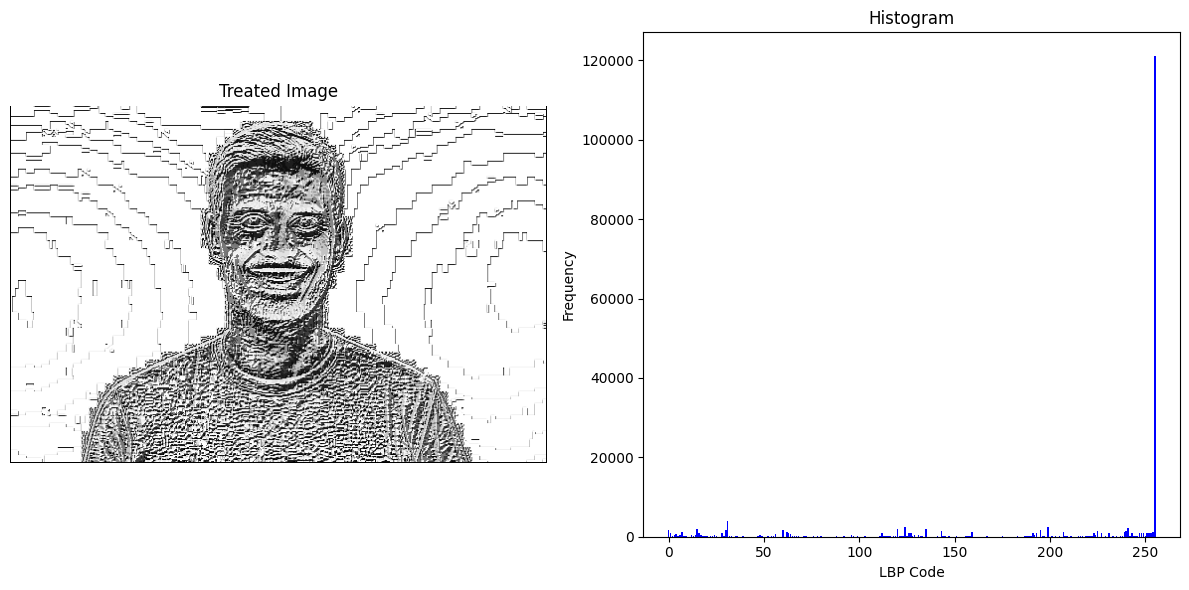

In [31]:
display_image_and_histogram(traited_image, histogram)